In [36]:
# import libraries 
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score

In [28]:
from sklearn.model_selection import train_test_split
#  generate dataset 
X,y = make_classification(n_samples=2000, weights=[1,1],n_classes=2,random_state=1)

In [29]:
X.shape

(2000, 20)

In [30]:
#train_test split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state =1 )

#####  Random Forest 

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_train_predic = rf.predict(X_train)
y_test_predic = rf.predict(X_test)
print("Trainng data ROC_AUC score ",roc_auc_score(y_train,y_train_predic) )
print("Test data ROC_AUC score ",roc_auc_score(y_test,y_test_predic) )

Trainng data ROC_AUC score  1.0
Test data ROC_AUC score  0.9566666666666667


#### Logistic Regression 

In [32]:
from sklearn.linear_model import  LogisticRegression
logr = LogisticRegression()
logr.fit(X_train,y_train)
y_train_predic = logr.predict(X_train)
y_test_predic = logr.predict(X_test)
print("Trainng data ROC_AUC score ",roc_auc_score(y_train,y_train_predic) )
print("Test data ROC_AUC score ",roc_auc_score(y_test,y_test_predic) )

Trainng data ROC_AUC score  0.9634942274449938
Test data ROC_AUC score  0.9650000000000001


#### Adaboost classifier 

In [20]:
from sklearn.ensemble import AdaBoostClassifier 
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)
y_train_predic = adb.predict(X_train)
y_test_predic = adb.predict(X_test)
print("Training data ROC_AUC score", roc_auc_score(y_train,y_train_predic))
print("Test data ROC_AUC score", roc_auc_score(y_test,y_test_predic))

Training data ROC_AUC score 0.9706923188385093
Test data ROC_AUC score 0.9349999999999999


### KNN classifier 


In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_train_predic = knn.predict(X_train)
y_test_predic = knn.predict(X_test)
print("Training data ROC_AUC score", roc_auc_score(y_train,y_train_predic))
print("Test data ROC_AUC score", roc_auc_score(y_test,y_test_predic))

Training data ROC_AUC score 0.9391713317183376
Test data ROC_AUC score 0.8866666666666667


### Finding threshold value 

In [22]:
pred =[]
#ensambling of all 4 model prediction 
for model in [rf,knn,adb,logr]:
  pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_predic = pd.concat(pred,axis=1).mean(axis=1)
print(" ROC_AUC score on ensemble of prediction", roc_auc_score(y_test,final_predic))


 ROC_AUC score on ensemble of prediction 0.9844999999999999


In [23]:
# how 'pd.concat' assebled the prediction of model rf,knn,adb,logr repectively
pd.concat(pred,axis =1,).rename(columns={0:'rf',1:'knn',2:'adb',3:'logr'}).head()

,rf,knn,adb,logr
0,0.98,1.0,0.559186,0.991861
1,0.00,0.0,0.463282,0.000008
2,0.99,0.8,0.538202,0.966929
3,0.91,0.8,0.509875,0.761539
4,0.60,0.4,0.490344,0.779443


In [24]:
print(final_predic.head())
#final_predic[0] =0.88 , it is avg of (0.99+1.0+0.559186+0.991861) 

0    0.882762
1    0.115823
2    0.823783
3    0.745353
4    0.567447
dtype: float64


In [69]:
# calculate roc curve with final ensambled prediction
fpr,tpr,thresholds = roc_curve(y_test, final_predic)
thresholds

array([1.9134413 , 0.9134413 , 0.90906694, 0.90827475, 0.80952418,
       0.80912833, 0.80448866, 0.8030558 , 0.78140513, 0.78071156,
       0.77423524, 0.77287124, 0.73004822, 0.72887362, 0.71721721,
       0.71393711, 0.67851868, 0.67493537, 0.60744697, 0.60425354,
       0.59245356, 0.59114346, 0.57838469, 0.57736186, 0.54845371,
       0.53877948, 0.52615858, 0.47116892, 0.4346034 , 0.39725652,
       0.39629719, 0.35745613, 0.35586612, 0.24369003, 0.23896893,
       0.23348126, 0.23140421, 0.19938001, 0.19848417, 0.11788782,
       0.1178351 , 0.10498954])

In [71]:
# to select threshold out of above values 
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_predic>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
28,0.434603,0.961667
27,0.471169,0.958333
24,0.548454,0.958333
26,0.526159,0.956667
25,0.538779,0.956667


Text(0.5, 1.0, 'Receiver operating characteristic')

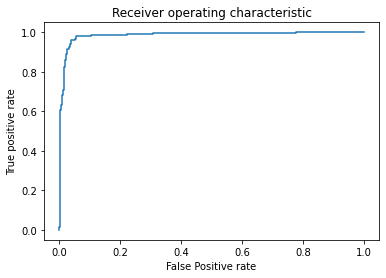

In [45]:
# ROC curve
plt.plot(fpr,tpr,label ='ROC' )
plt.xlabel("False Positive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating characteristic")